### Dependencies

In [43]:
# Visualization Dependencies
from IPython.display import Image, SVG
import seaborn as sns
import os
import numpy as np

### Import and Shape Data

In [44]:
!pip install emnist

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
# pip install emnist
# Import Dataset(s)
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [46]:
# Working with 'letters'
# Import 
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('letters')
from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('letters')

In [47]:
# Check shape of training and testing data
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


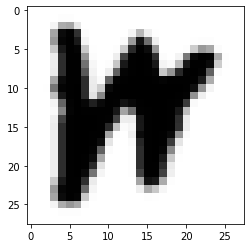

In [48]:
# Plot an image
import matplotlib.pyplot as plt
plt.imshow(images_train[0,:,:], cmap=plt.cm.Greys)

In [49]:
# Flatten Data
dims = images_train.shape[1] * images_train.shape[2]
X_train = images_train.reshape(images_train.shape[0], dims)
X_test = images_test.reshape(images_test.shape[0], dims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (124800, 784)
Testing Shape: (20800, 784)


In [50]:
# Rescale to 0 -> 1 by dividing by max pixel value (255)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [51]:
# One-Hot Encoding

from keras.utils import np_utils # used to convert array of labeled data to one-hot vector
# should be 26 but out of index?
# Effects accuracy as have a class where their will be no results
num_classes = 27
y_train = np_utils.to_categorical(labels_train, num_classes)
y_test = np_utils.to_categorical(labels_test, num_classes)

## Create and Evaluate Model

In [54]:
# Empty Sequential model
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential()

#Layers
# 1 - number of elements (pixels) in each image
# Dense layer - when every node from previous layer is connected to each node in current layer
model.add(Dense(500, activation='relu'))

# Second Hidden Layer
model.add(Dense(500, activation='relu'))

#Third Hidden Layer
model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))

#Output Layer - number of nodes corresponds to number of y labels
model.add(Dense(num_classes, activation='softmax'))

In [55]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop' , metrics=['accuracy'])

In [56]:
# Train Model
model.fit(X_train, y_train, batch_size=128, epochs=10, shuffle=True, verbose=1)


Epoch 1/10
975/975 [==============================] - 16s 15ms/step - loss: 0.6412 - accuracy: 0.8030
Epoch 2/10
975/975 [==============================] - 15s 15ms/step - loss: 0.3372 - accuracy: 0.8938
Epoch 3/10
975/975 [==============================] - 15s 15ms/step - loss: 0.2992 - accuracy: 0.9071
Epoch 4/10
975/975 [==============================] - 14s 14ms/step - loss: 0.2951 - accuracy: 0.9100
Epoch 5/10
975/975 [==============================] - 15s 15ms/step - loss: 0.2995 - accuracy: 0.9110
Epoch 6/10
975/975 [==============================] - 16s 17ms/step - loss: 0.3081 - accuracy: 0.9101
Epoch 7/10
975/975 [==============================] - 18s 19ms/step - loss: 0.3133 - accuracy: 0.9094
Epoch 8/10
975/975 [==============================] - 16s 17ms/step - loss: 0.3284 - accuracy: 0.9080
Epoch 9/10
975/975 [==============================] - 17s 17ms/step - loss: 0.3357 - accuracy: 0.9073
Epoch 10/10
975/975 [==============================] - 17s 17ms/step - loss: 0.344

In [57]:
# Save Model
model.save("emnist_trained.h5")

In [58]:
# Load Model
from tensorflow.keras.models import load_model
model = load_model("emnist_trained.h5")

In [59]:
# Evaluate Model
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

650/650 - 3s - loss: 0.4937 - accuracy: 0.9006 - 3s/epoch - 4ms/step
Loss: 0.49368271231651306, Accuracy: 0.9005769491195679
